In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
r2=r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve, auc
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.shape

(907, 27)

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Total 907 rows are there and for some columns we observe all values are none. We will remove that columns along with irrelevant columns

In [6]:
df = df.drop(columns = ['estimated_generation_gwh','generation_gwh_2019','generation_gwh_2013','wepp_id','other_fuel3','other_fuel2','other_fuel1','owner','commissioning_year','url'])

In [7]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [8]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [9]:
df = df.dropna(axis = 0)

In [10]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [11]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,2019.0,617.789264,843.7470,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,2019.0,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,Central Electricity Authority
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Central Electricity Authority,WRI,2019.0,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,Central Electricity Authority
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,Central Electricity Authority,WRI,2019.0,157.558250,152.1952,61.421350,89.629600,48.327150,Central Electricity Authority
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,Central Electricity Authority,WRI,2019.0,674.391100,721.3352,675.724400,679.594950,579.318850,Central Electricity Authority


In [12]:
df.shape

(385, 17)

In [13]:
df['primary_fuel'].unique()

array(['Gas', 'Coal', 'Hydro', 'Oil', 'Nuclear'], dtype=object)

Gas, Coal, Hydro, Oil, Nuclear are the fules for different power plant in our dataset

In [14]:
df['country'].unique()

array(['IND'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 3 to 899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 385 non-null    object 
 1   country_long            385 non-null    object 
 2   name                    385 non-null    object 
 3   gppd_idnr               385 non-null    object 
 4   capacity_mw             385 non-null    float64
 5   latitude                385 non-null    float64
 6   longitude               385 non-null    float64
 7   primary_fuel            385 non-null    object 
 8   source                  385 non-null    object 
 9   geolocation_source      385 non-null    object 
 10  year_of_capacity_data   385 non-null    float64
 11  generation_gwh_2014     385 non-null    float64
 12  generation_gwh_2015     385 non-null    float64
 13  generation_gwh_2016     385 non-null    float64
 14  generation_gwh_2017     385 non-null    fl

<AxesSubplot:xlabel='capacity_mw', ylabel='country_long'>

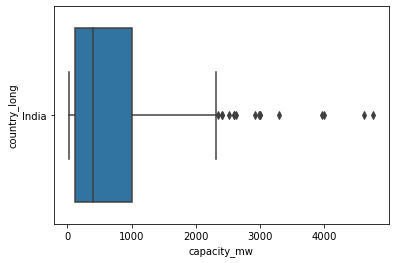

In [16]:
sns.boxplot(x='capacity_mw',y='country_long', data=df)

After Data cleaning, We have left with power plant operating in INDIA only.
Most of the power plant's operating capcity is between 0 to 1500 mw
Only country after nan removal left is India so we will drop country and country_long column and source
We will aslo remove gppd_idnr as it is highly corelated with names column

In [17]:
df = df.drop(columns = ['country','country_long','source','geolocation_source','generation_data_source','year_of_capacity_data','gppd_idnr'])

In [18]:
df.shape

(385, 10)

# Encoding

In [19]:
for col in df.columns:
    if df[col].dtype == object:
        print(col)

name
primary_fuel


In [20]:
le = LabelEncoder()

In [21]:
name_encoding = le.fit_transform(df['name'])
name_encoding 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [22]:
primary_fuel_encoding = le.fit_transform(df['primary_fuel'])
primary_fuel_encoding 

array([1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 0, 4, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0,
       1, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0,
       2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 0,
       2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 3, 0, 2, 3, 2, 2, 0, 0, 1,
       2, 2, 1, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 4, 0, 2, 1, 2,
       0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 3, 0, 0, 1, 2, 2, 2, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 3, 2, 1, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 4, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1,
       1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0,

In [23]:
df['name'] = name_encoding
df['primary_fuel'] = primary_fuel_encoding 

In [24]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,0,135.0,23.8712,91.3602,1,617.789264,843.7470,886.004428,663.774500,626.239128
4,1,1800.0,21.9603,82.4091,0,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000
5,2,250.0,23.7689,68.6447,0,1153.421000,1208.8520,1175.765000,1147.913000,976.655000
6,3,60.0,10.4547,77.0078,2,157.558250,152.1952,61.421350,89.629600,48.327150
7,4,192.0,32.2258,77.2070,2,674.391100,721.3352,675.724400,679.594950,579.318850


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 3 to 899
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 385 non-null    int32  
 1   capacity_mw          385 non-null    float64
 2   latitude             385 non-null    float64
 3   longitude            385 non-null    float64
 4   primary_fuel         385 non-null    int32  
 5   generation_gwh_2014  385 non-null    float64
 6   generation_gwh_2015  385 non-null    float64
 7   generation_gwh_2016  385 non-null    float64
 8   generation_gwh_2017  385 non-null    float64
 9   generation_gwh_2018  385 non-null    float64
dtypes: float64(8), int32(2)
memory usage: 38.2 KB


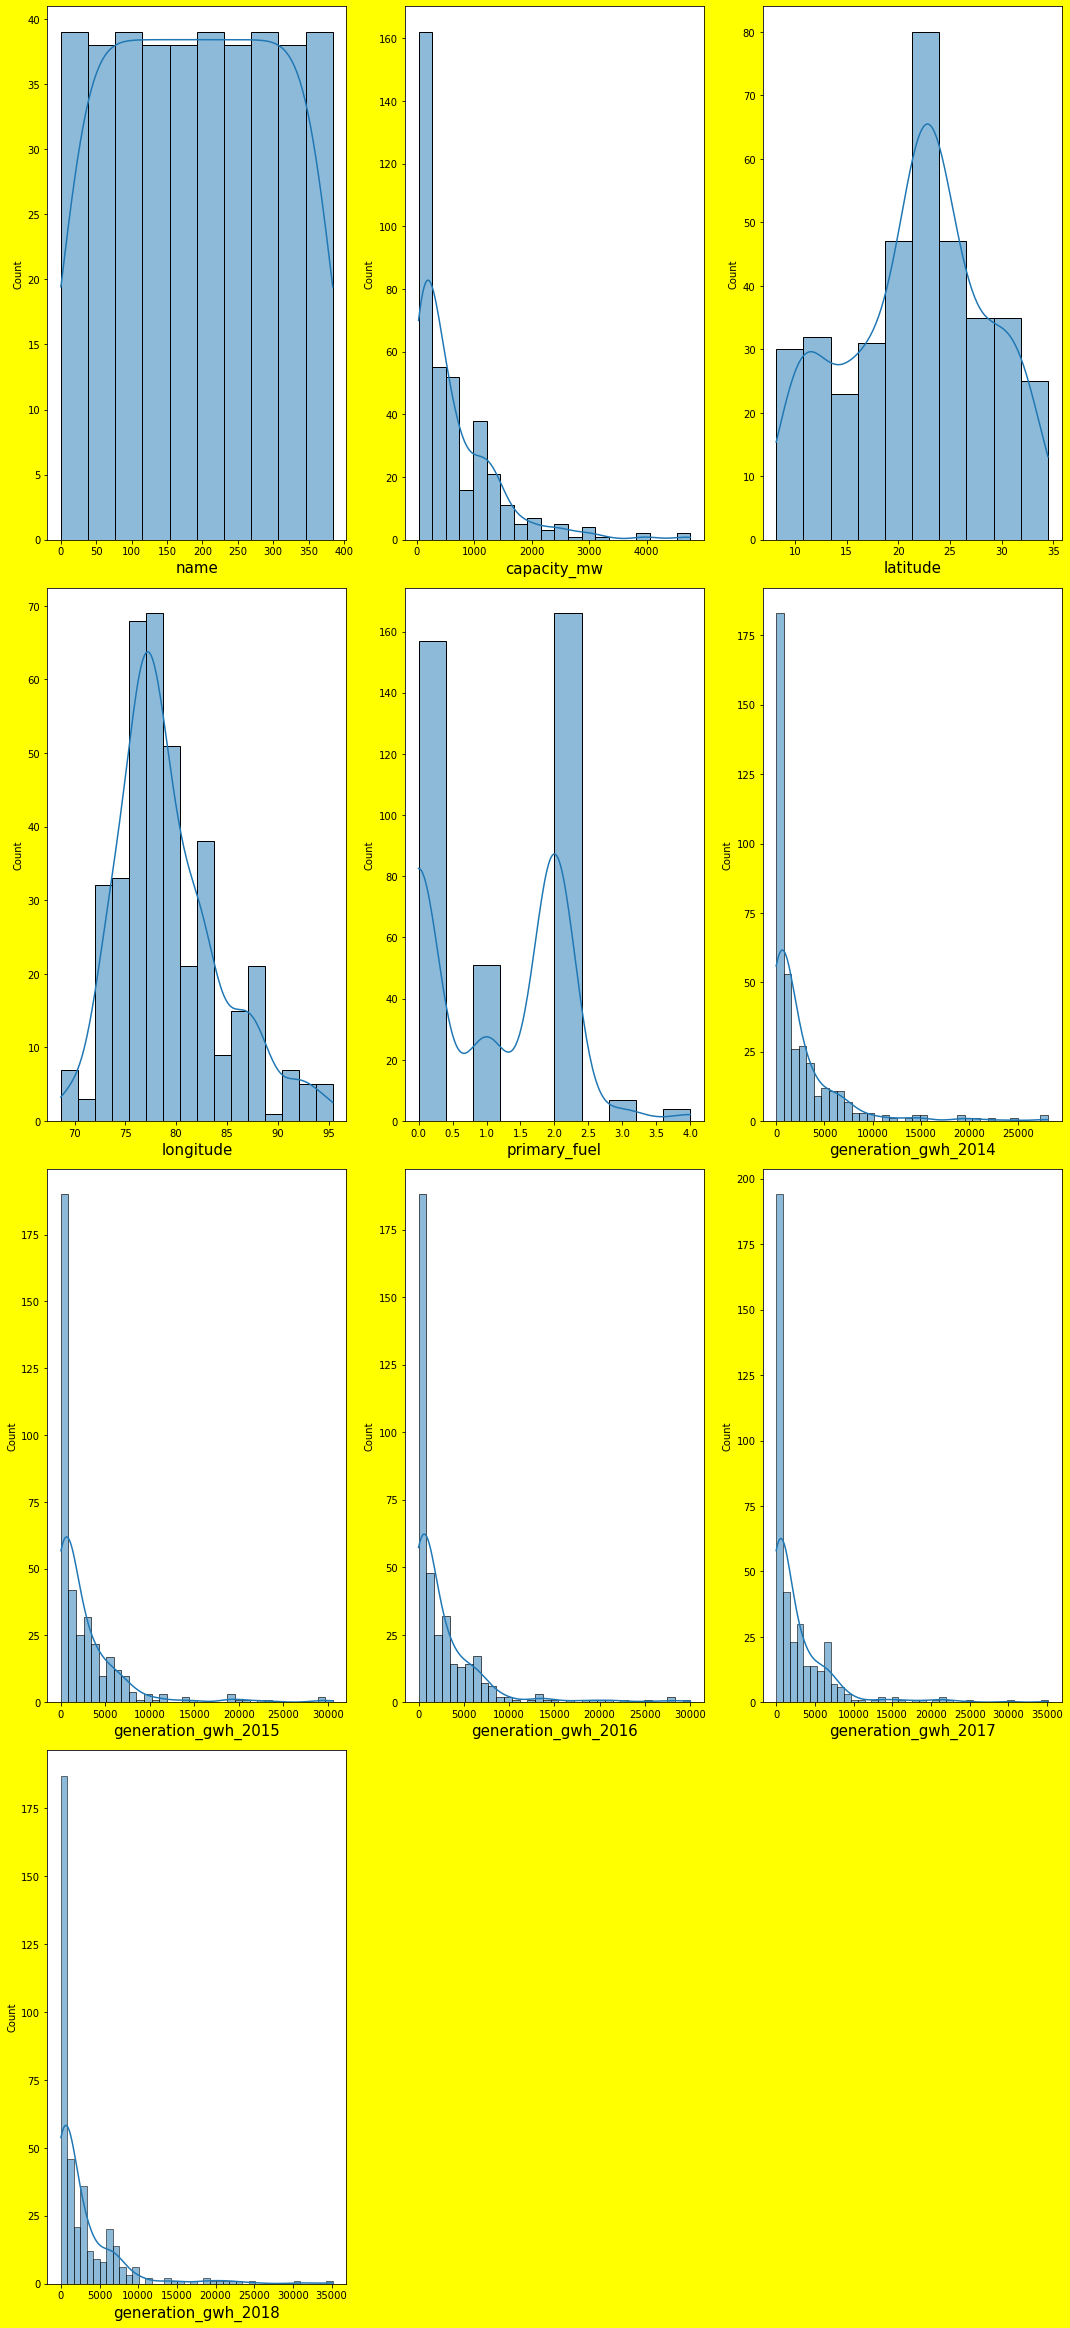

In [26]:
plt.figure(figsize=(15,40), facecolor='yellow')
plotnumber=1

for column in df:
    plt.subplot(5,3,plotnumber)
    sns.histplot(df[column], kde=True)
    #sns.distplot(df[column])
    plt.xlabel(column, fontsize=15)
    plotnumber += 1
    
plt.tight_layout()

# Prediction for Primary Fuel

In [27]:
df.corr()['primary_fuel'].sort_values(ascending = True)

capacity_mw           -0.489104
generation_gwh_2017   -0.446759
generation_gwh_2018   -0.446221
generation_gwh_2016   -0.440490
generation_gwh_2015   -0.432535
generation_gwh_2014   -0.415422
longitude             -0.172285
name                  -0.043162
latitude               0.016271
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

In [28]:
x = df.drop(columns = ['primary_fuel'])
y = df['primary_fuel']

print('features shape',x.shape,'\n' 'Label Shape',y.shape)

features shape (385, 9) 
Label Shape (385,)


In [29]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70)

Model Selection

Logistics Regression

In [30]:
lr = LogisticRegression()
lr_score = cross_val_score(lr, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
lr_score.mean()

-1.1229034123770965

Random Forest Classifier

In [31]:
rf = RandomForestClassifier()
rf_score = cross_val_score(rf, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
rf_score.mean()

-0.7045498361287834

Support Vector Classifier

In [32]:
svc=SVC()
svc_score = cross_val_score(svc, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
svc_score.mean()

-0.8893387314439946

K Neighbors Classifier

In [33]:
knn = KNeighborsClassifier()
knn_score = cross_val_score(knn, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
knn_score.mean()

-0.826007326007326

Decision Tree Classifier

In [34]:
dt = DecisionTreeClassifier()
dt_score = cross_val_score(dt, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
dt_score.mean()

-0.8515519568151148

We observed minimum negative mean squared error for Random Forest Classifier, Will hypertune this model

In [35]:
gcv = GridSearchCV

In [36]:
params = {
    'max_features': ['auto','sqrt','log2'],
         'max_depth':[4,5,6,7,8],
         'criterion':['gini','entropy'],
         "n_estimators":[10,50,120,350]
         }

In [37]:
hypt = gcv(rf, params, cv=7, scoring='accuracy')

hypt.fit(x_train,y_train)

hypt.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 120}

# Random Forest Classifier

In [38]:
rf = RandomForestClassifier(n_estimators=50, max_depth=6, max_features= 'sqrt', criterion='gini')

In [39]:
maxAcc = 0
maxRS = 0

for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70, random_state=i)
    rf.fit(x_train,y_train)
    y_pred_test = rf.predict(x_test)
    y_pred_train = rf.predict(x_train)
    acc=accuracy_score(y_test, y_pred_test)
    #print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print('Max Accuracy', maxAcc, 'Max Random State', maxRS)

Max Accuracy 0.8448275862068966 Max Random State 72


# Score Report of the Model

In [40]:
#Testing Report
print(classification_report(y_test , y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        44
           1       0.38      0.27      0.32        11
           2       0.87      0.91      0.89        58
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2

    accuracy                           0.79       116
   macro avg       0.40      0.40      0.40       116
weighted avg       0.76      0.79      0.78       116



In [41]:
#Training Report
print(classification_report(y_train , y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       113
           1       1.00      0.85      0.92        40
           2       0.89      0.99      0.94       108
           3       1.00      0.33      0.50         6
           4       1.00      1.00      1.00         2

    accuracy                           0.93       269
   macro avg       0.97      0.82      0.86       269
weighted avg       0.94      0.93      0.93       269



# Confusion Matrix

<AxesSubplot:>

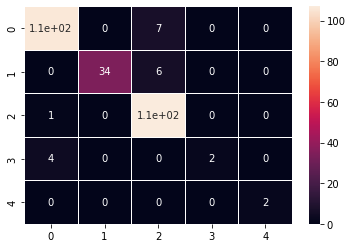

In [42]:
#train
cmtrain = confusion_matrix(y_train, y_pred_train)
cmtrain
sns.heatmap(cmtrain, annot = True, linewidth=0.5)


<AxesSubplot:>

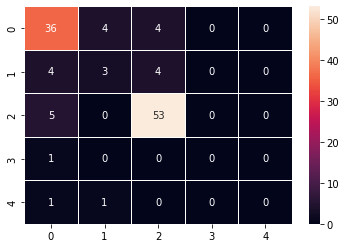

In [43]:
#test
cmtest = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cmtest, annot = True, linewidth=0.5)

Saving the Classification Model

In [44]:
import pickle

In [45]:
pickle.dump('rf', open('Randomforest_model_for_primary_fuel', 'wb'))

# Prediction for capacity_mw

In [46]:
from sklearn.preprocessing import power_transform

In [47]:
d = power_transform(df)

In [48]:
df = pd.DataFrame(d, columns = df.columns)

In [49]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-2.141620,-0.718268,0.306407,1.949529,0.092492,-0.229752,-0.087512,-0.045687,-0.192056,-0.235409
1,-2.107032,1.401713,0.018783,0.749626,-1.140995,0.703393,1.152157,1.178553,1.052730,1.251234
2,-2.077322,-0.251131,0.290933,-3.023768,-1.140995,0.103050,0.110271,0.106913,0.089284,-0.012716
3,-2.050393,-1.298598,-1.635660,-0.348259,0.932306,-0.833464,-0.873062,-1.164631,-1.009847,-1.217689
4,-2.025361,-0.454010,1.596181,-0.300869,0.932306,-0.185373,-0.169844,-0.184881,-0.180528,-0.272614


In [50]:
df.corr()['capacity_mw'].sort_values(ascending = True)

primary_fuel          -0.589967
longitude             -0.008331
latitude               0.073821
name                   0.095939
generation_gwh_2014    0.695876
generation_gwh_2018    0.763913
generation_gwh_2015    0.783925
generation_gwh_2017    0.786513
generation_gwh_2016    0.800794
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = variance_inflation_factor

In [52]:
v = df.drop('capacity_mw',axis=1)

In [53]:
vif_data=pd.DataFrame()
vif_data['Feature']=v.columns

In [54]:
vif_data['VIF']=[variance_inflation_factor(v.values,i)
                    for i in range(len(v.columns))]
    
print(vif_data)

               Feature        VIF
0                 name   1.035134
1             latitude   1.092000
2            longitude   1.055244
3         primary_fuel   1.515122
4  generation_gwh_2014   4.279655
5  generation_gwh_2015   9.678022
6  generation_gwh_2016  19.547434
7  generation_gwh_2017  25.810986
8  generation_gwh_2018  14.108088


Model Selection

In [55]:
x = df.drop('capacity_mw' ,axis =1)
y = df['capacity_mw']

print('features shape',x.shape,'\n' 'Label Shape',y.shape)

features shape (385, 9) 
Label Shape (385,)


In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70)

Linear Regression

In [57]:
Lr = LinearRegression()
Lr_score = cross_val_score(Lr, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
Lr_score.mean()

-0.3357769581358376

Random Forest Regressor

In [58]:
Rf = RandomForestRegressor()
Rf_score = cross_val_score(Rf, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
Rf_score.mean()

-0.1453566265130653

Support Vector Regressor

In [59]:
svr=SVR()
svr_score = cross_val_score(svr, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
svr_score.mean()

-0.15430376949217228

Decision Tree Regressor

In [60]:
Dt = DecisionTreeRegressor()
Dt_score = cross_val_score(Dt, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
Dt_score.mean()

-0.24978867856782946

K Neighbors Regressor

In [61]:
Knn = KNeighborsRegressor()
Knn_score = cross_val_score(Knn, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
Knn_score.mean()

-0.2361037428725892

We observed minimum negative mean squared error for Random Forest Regressor, We will hypertune this model

In [62]:
param = {"n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
         }

In [63]:
hypt = gcv(Rf, param, cv=7)

hypt.fit(x_train,y_train)

hypt.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 30}

We will now Train the Random Forest Model

# Random Forest Regressor

In [64]:
Rf = RandomForestRegressor(n_estimators=20, min_samples_split=4, max_features= 'log2', bootstrap=True)

In [65]:
maxr2 = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70, random_state=i)
    Rf.fit(x_train,y_train)
    y_pred_test = Rf.predict(x_test)
    y_pred_train = Rf.predict(x_train)
    scr_test=r2(y_test, y_pred_test)
    scr_train=r2(y_train, y_pred_train)
    #print('accuracy', acc, 'random state',i)
    
    
    if scr_test>maxr2:
        maxr2 = scr_test
        maxRS = i
print('Testing Max Score', maxr2, 'Max Random State', maxRS)


Testing Max Score 0.9186791759035952 Max Random State 145


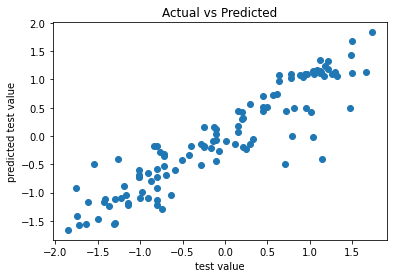

In [66]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('test value')
plt.ylabel('predicted test value')
plt.title("Actual vs Predicted")
plt.show()

We can see linear relation between testing and predicted values with 90 % accuracy

# Model Evaluation

Testing Errors

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [68]:
mean_absolute_error(y_test, y_pred_test)

0.268548317866432

In [69]:
mean_squared_error(y_test, y_pred_test)

0.14246876893713

In [70]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

0.3774503529434434

Training Errors

In [71]:
mean_absolute_error(y_train, y_pred_train)

0.1280411329136207

In [72]:
mean_squared_error(y_train, y_pred_train)

0.02972692838673626

In [73]:
np.sqrt(mean_squared_error(y_train, y_pred_train))

0.17241498886911272

# Regularization

In [74]:
from sklearn.linear_model import Lasso, LassoCV

In [75]:
lasscv = LassoCV(alphas=None, max_iter=99999, normalize=True)
a = lasscv.fit(x_train, y_train)
a

LassoCV(max_iter=99999, normalize=True)

In [76]:
alpha = a.alpha_
alpha

0.0008879149908388272

In [77]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0008879149908388272)

In [78]:
lasso_reg.score(x_test, y_test)

0.6089222165861452

As we can see there is no need of regularization because Random Forest is giving good score and data is not overfitted, We will save random forest model

# Saving the Model

In [79]:
import pickle

In [80]:
pickle.dump('Rf', open('Randomforest_model_for_capacity_mw', 'wb'))